In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv("train_LZdllcl.csv")
test_data=pd.read_csv("test_2umaH9m.csv")

In [3]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
print("Shape of training data: ",train_data.shape)
print("Shape of testing data: ",test_data.shape)

Shape of training data:  (54808, 14)
Shape of testing data:  (23490, 13)


In [6]:
train_data.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
train_data.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [9]:
test_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

# Uni-variate  Data Visualization

In [10]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [11]:
stopword=set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', stopwords = stopword).generate(str(train_data['department']))

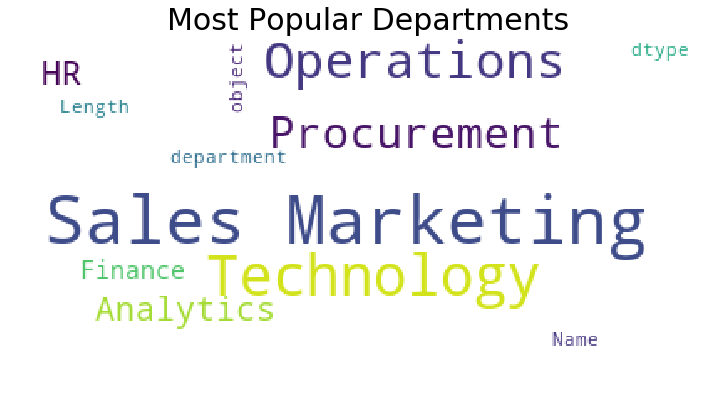

In [12]:
plt.rcParams['figure.figsize'] = (12, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Departments', fontsize = 30)
plt.axis('off')
plt.show()

In [13]:
train_data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [14]:
#finding  the %age of people promoted

promoted=(4668/54808)*100
print("Percentage of Promoted Employees is {:.2f}%".format(promoted))

Percentage of Promoted Employees is 8.52%


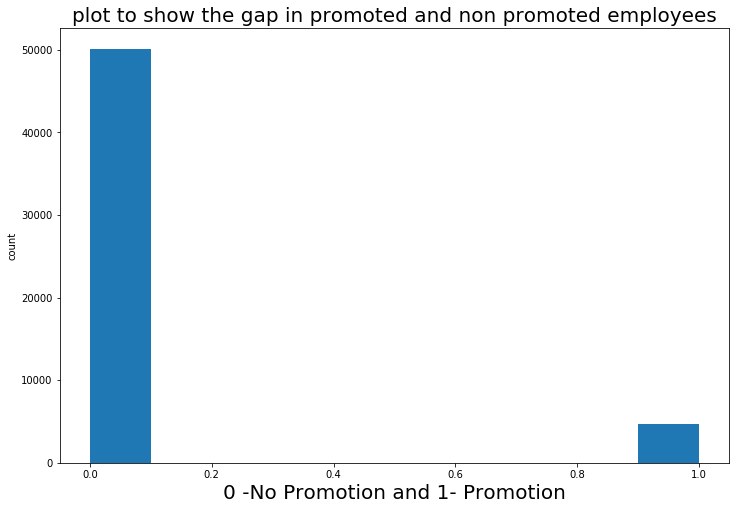

In [15]:

plt.hist(train_data['is_promoted'])
plt.title("plot to show the gap in promoted and non promoted employees",fontsize=20)
plt.xlabel('0 -No Promotion and 1- Promotion', fontsize = 20)
plt.ylabel('count')
plt.show()

c:\users\snehanshu17\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


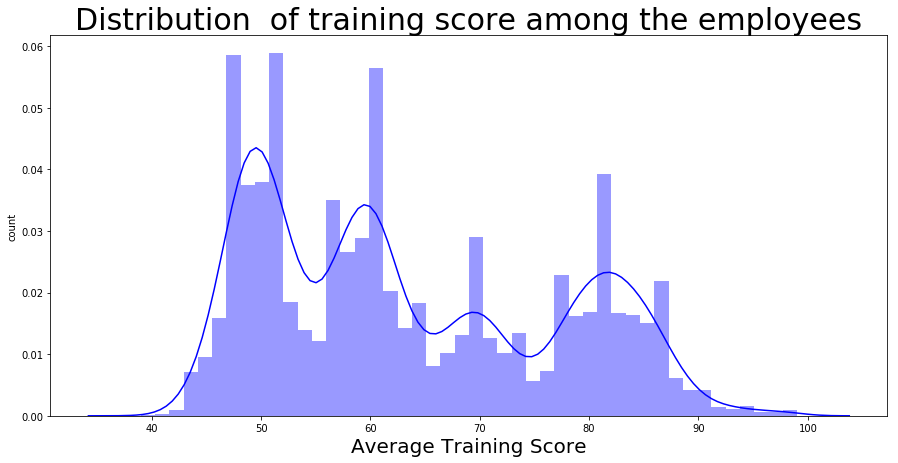

In [16]:
# checking the distribution of the avg_training score of the Employees

plt.rcParams['figure.figsize']=(15,7)
sns.distplot(train_data['avg_training_score'],color='blue')
plt.title('Distribution  of training score among the employees',fontsize=30)
plt.xlabel('Average Training Score',fontsize=20)
plt.ylabel('count')
plt.show()

In [17]:
train_data['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

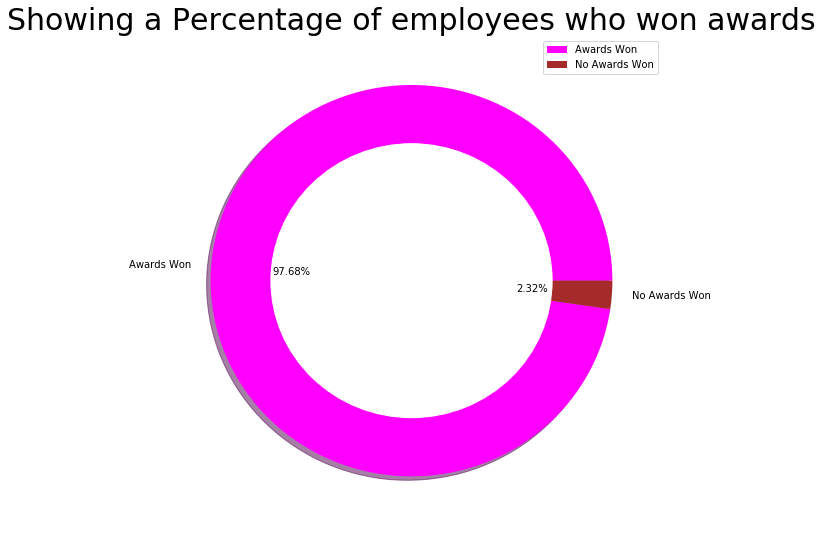

In [18]:
# plotting a donut chart for visualizing each of the recruitment channel's share
size=[53538,1270]
colors=['magenta','brown']
labels="Awards Won" ,"No Awards Won"

my_circle=plt.Circle((0,0),0.7,color="white")

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing a Percentage of employees who won awards', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [19]:
train_data['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

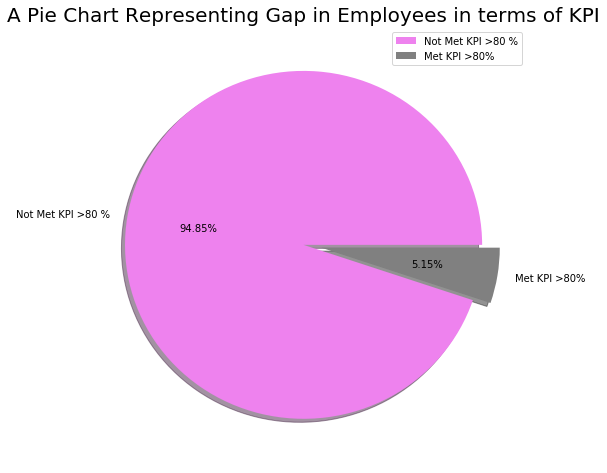

In [20]:
# plotting a pie chart

size=[355217,19291]
labels="Not Met KPI >80 %","Met KPI >80%"
colors=['violet','grey']
explode=[0,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Gap in Employees in terms of KPI', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

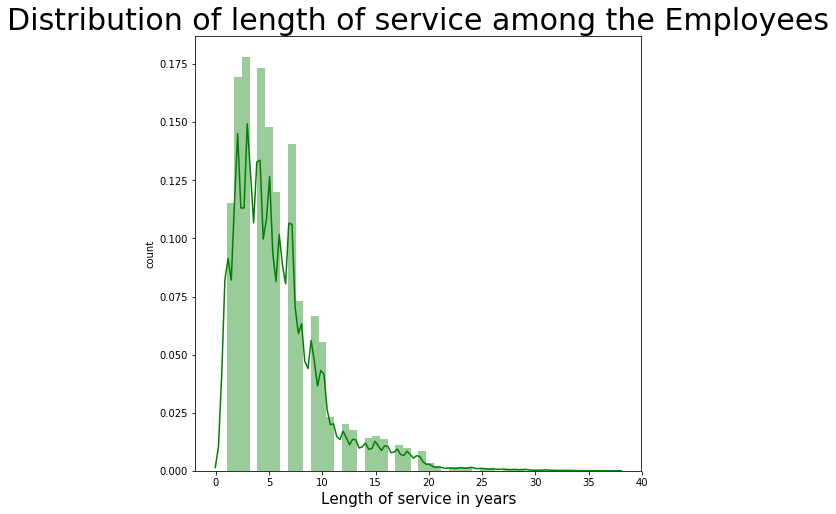

In [21]:
# checking the distribution of length of service
sns.distplot(train_data['length_of_service'],color='green')
plt.title('Distribution of length of service among the Employees',fontsize=30)
plt.xlabel('Length of service in years',fontsize=15)
plt.ylabel('count')
plt.show()

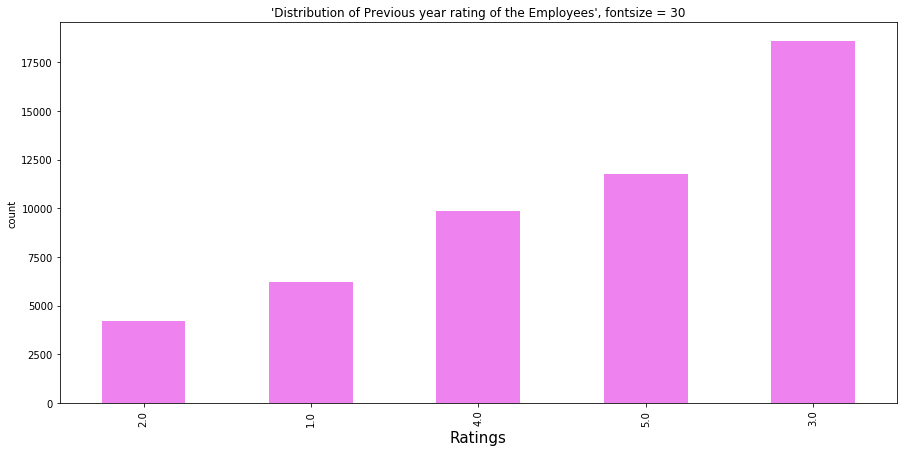

In [22]:
train_data['previous_year_rating'].value_counts().sort_values().plot.bar(color='violet',figsize=(15,7))
plt.title("'Distribution of Previous year rating of the Employees', fontsize = 30")
plt.xlabel('Ratings',fontsize=15)
plt.ylabel('count')
plt.show()

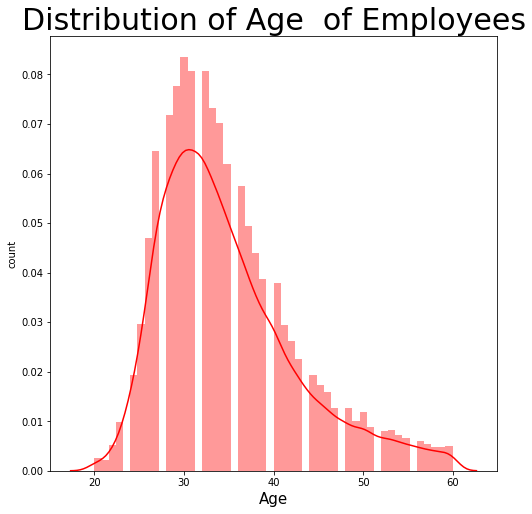

In [23]:
# checking the distribution of age of Employees in the company
sns.distplot(train_data['age'],color='red')
plt.title("Distribution of Age  of Employees",fontsize=30)
plt.xlabel('Age',fontsize=15)
plt.ylabel('count')
plt.show()

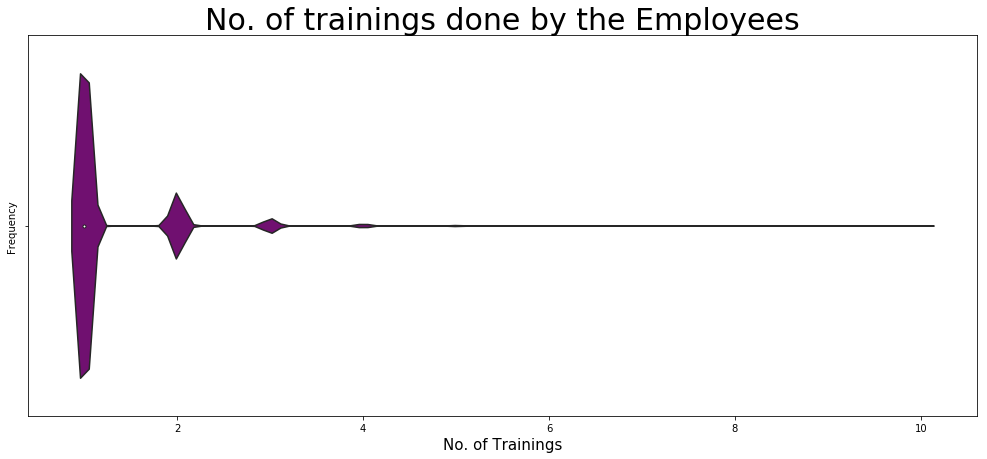

In [24]:
# checking the different no. of training done by the employees

plt.rcParams['figure.figsize']=(17,7)
sns.violinplot(train_data['no_of_trainings'],color='purple')
plt.title('No. of trainings done by the Employees', fontsize = 30)
plt.xlabel('No. of Trainings', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

In [25]:
train_data['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

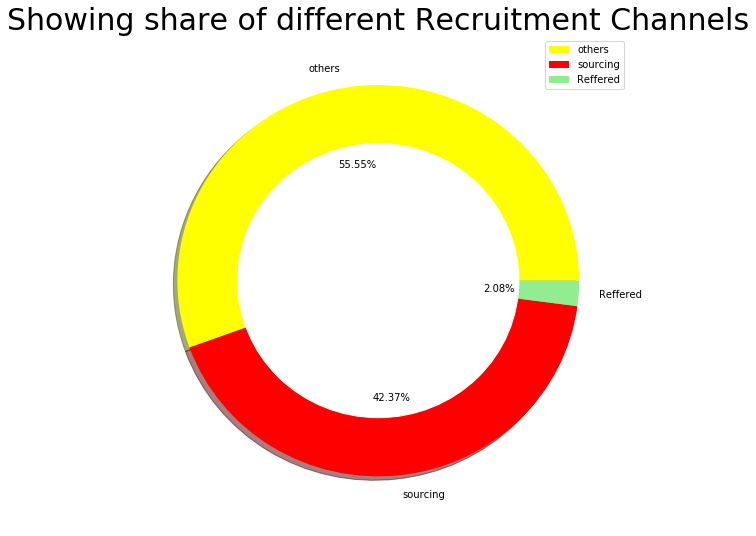

In [26]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size=[30446,23220,1142]
colors=['yellow','red','lightgreen']
labels="others","sourcing","Reffered"

my_circle=plt.Circle((0,0),0.7,color="white")

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

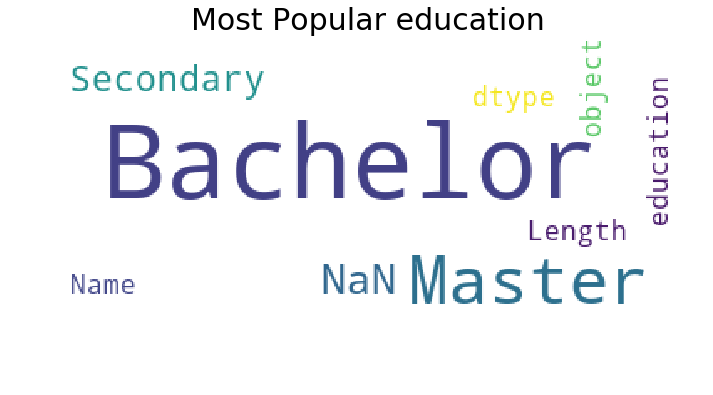

In [27]:
# checing the most popular education degree among the employe

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword=set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', stopwords = stopword).generate(str(train_data['education']))


plt.rcParams['figure.figsize'] = (12, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular education', fontsize = 30)
plt.axis('off')
plt.show()

In [28]:
#checking the gender gap

train_data['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

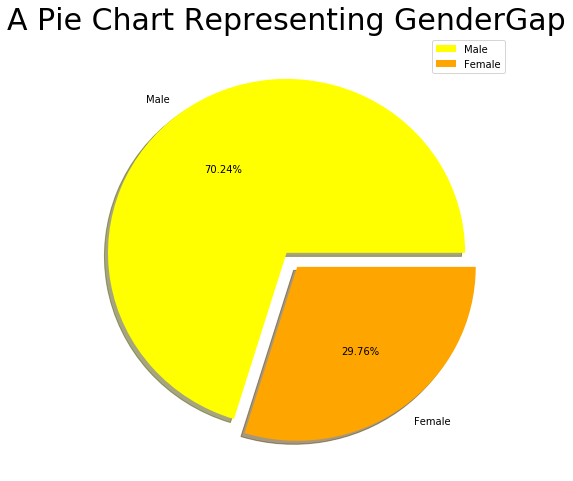

In [29]:
# plotting a pie chart

size=[38496,16312]
labels="Male","Female"
colors=['yellow','orange']
explode=[0,0.1]


plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing GenderGap', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

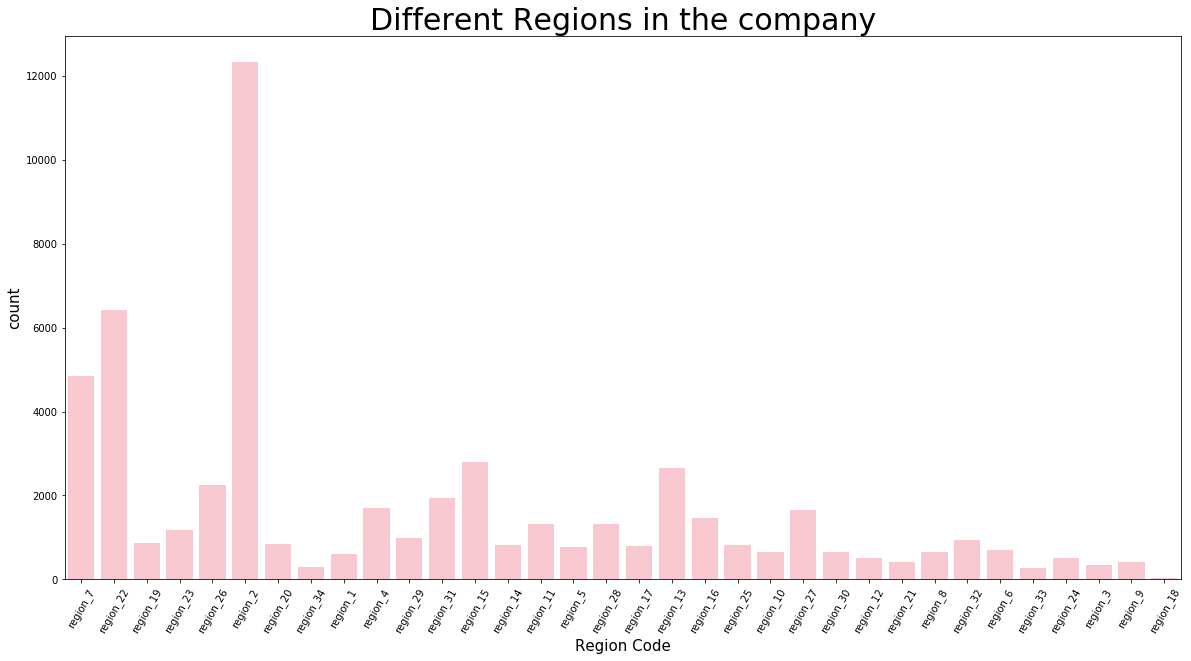

In [30]:
# checking the different regions of the company

plt.rcParams['figure.figsize']=(20,10)
sns.countplot(train_data['region'],color='pink')
plt.title('Different Regions in the company',fontsize=30)
plt.xticks(rotation=60)
plt.xlabel('Region Code', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

# Bi-varaiate Data Visualization

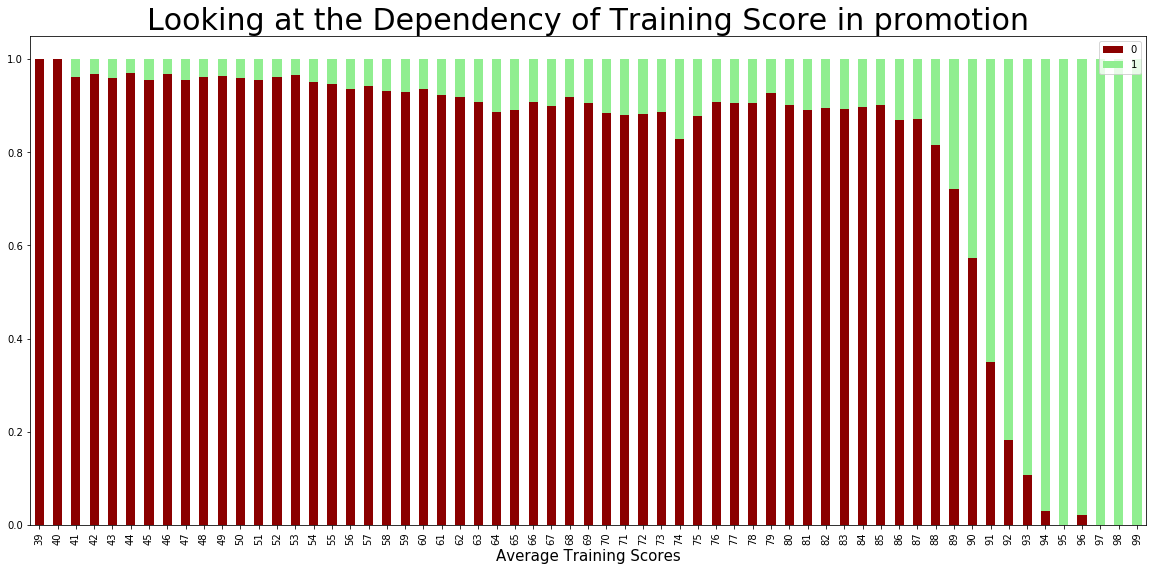

In [33]:
#scatter plot between average training score and is_promoted

data=pd.crosstab(train_data['avg_training_score'],train_data['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, figsize = (20, 9), color = ['darkred', 'lightgreen'])


plt.title('Looking at the Dependency of Training Score in promotion', fontsize = 30)
plt.xlabel('Average Training Scores', fontsize = 15)
plt.legend()
plt.show()

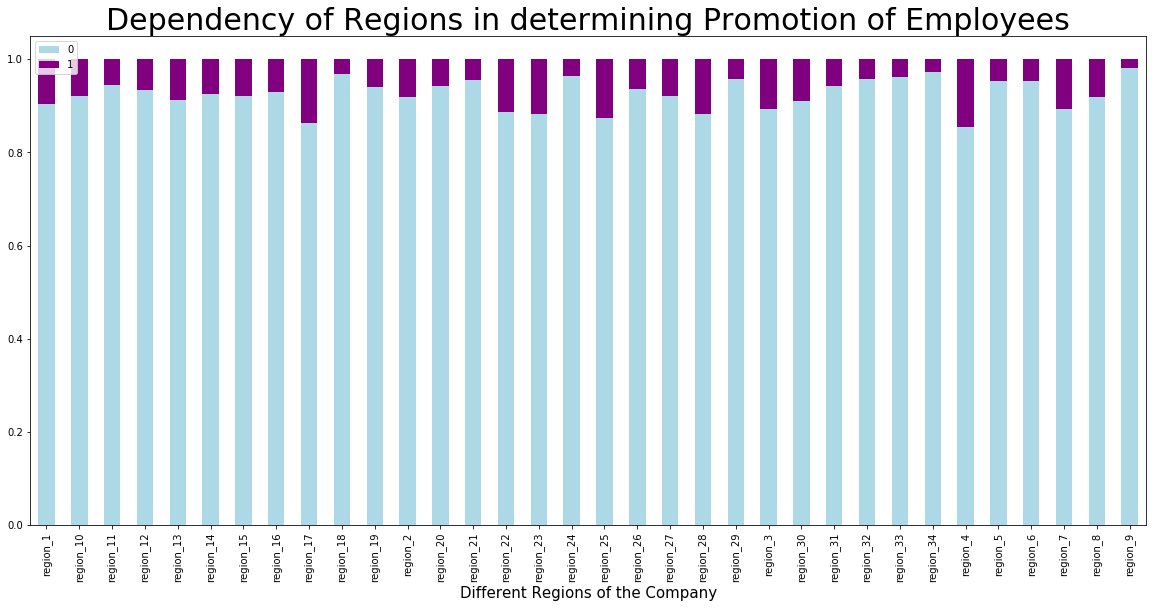

In [34]:
# checking dependency of different regions in promotion

data=pd.crosstab(train_data['region'],train_data['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, figsize = (20, 9), color = ['lightblue', 'purple'])


plt.title('Dependency of Regions in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Regions of the Company', fontsize = 15)
plt.legend()
plt.show()

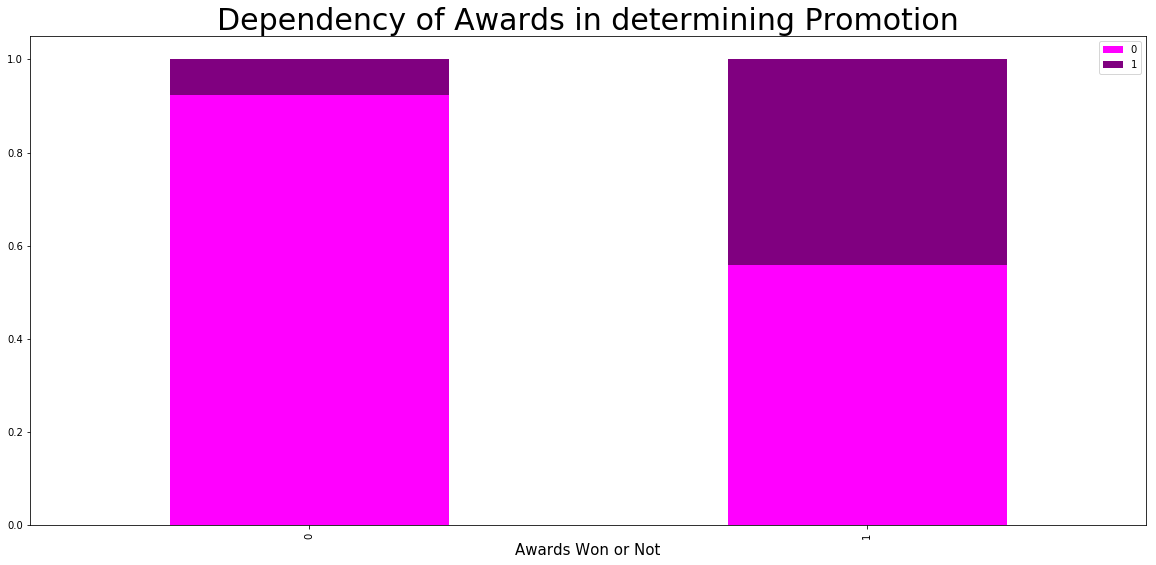

In [35]:
# dependency of awards won on promotion

data=pd.crosstab(train_data['awards_won?'],train_data['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, figsize = (20, 9), color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 15)
plt.legend()
plt.show()

There is a very good chance of getting promoted if the employee has won an award

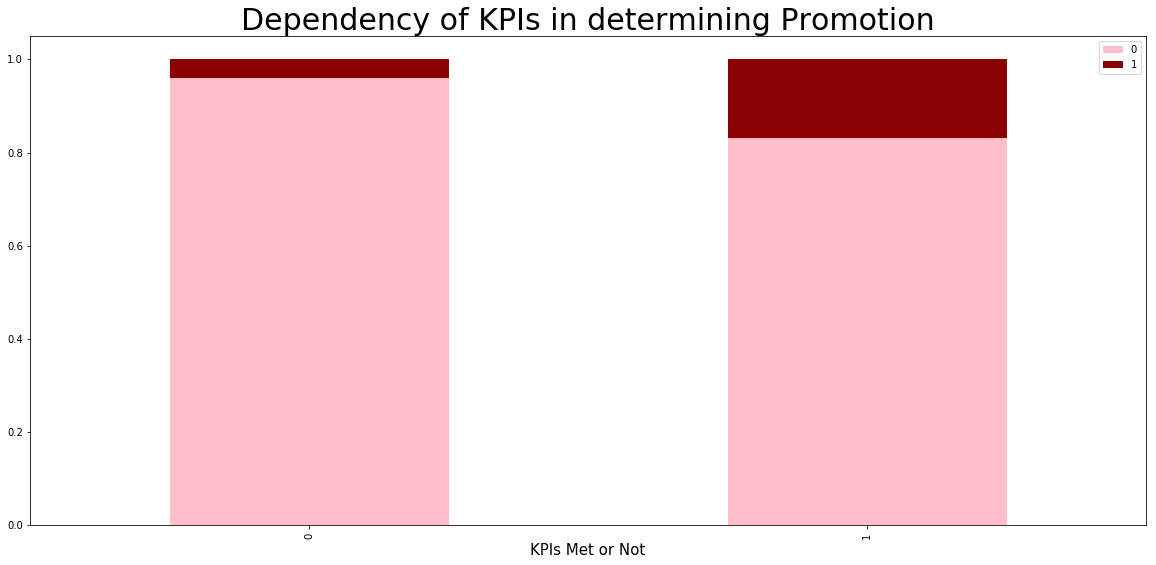

In [36]:
#dependency of KPIs with Promotion

data=pd.crosstab(train_data['KPIs_met >80%'],train_data['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, figsize = (20, 9), color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion', fontsize = 30)
plt.xlabel('KPIs Met or Not', fontsize = 15)
plt.legend()
plt.show()


Again Having a good KPI score increases the chances of getting promoted in the company.

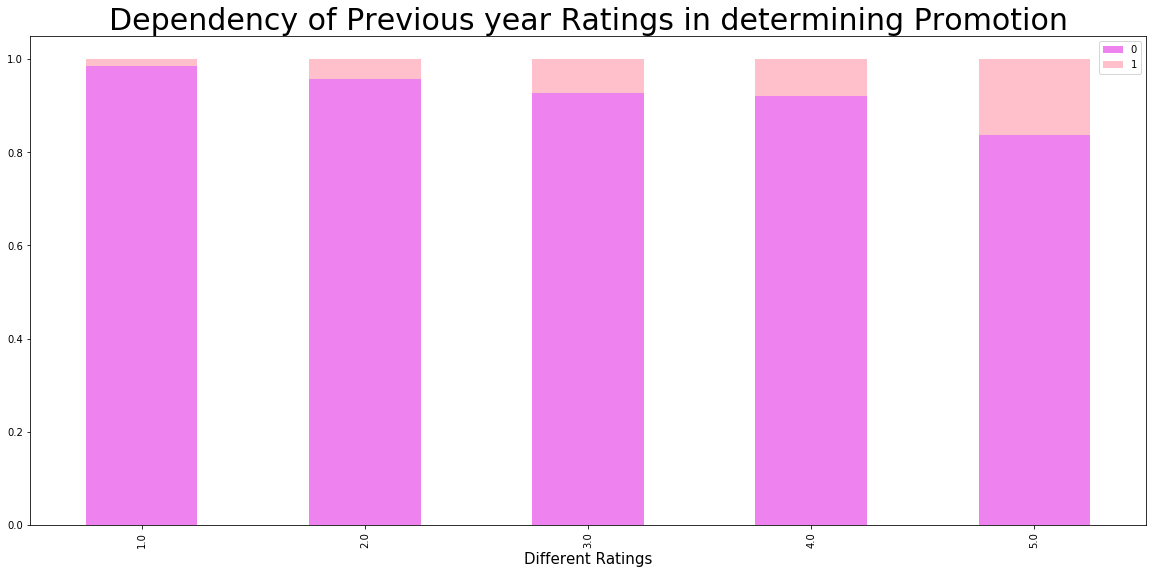

In [37]:
# checking dependency on previous years' ratings

data=pd.crosstab(train_data['previous_year_rating'],train_data['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, figsize = (20, 9), color = ['violet', 'pink'])

plt.title('Dependency of Previous year Ratings in determining Promotion', fontsize = 30)
plt.xlabel('Different Ratings', fontsize = 15)
plt.legend()
plt.show()

The Above Graph clearly suggests that previous ratings matter a lot, if the ratings are high, the chances of being promoted in the company increases and there is completely 
no promotion for the employees with previous year ratings = 0

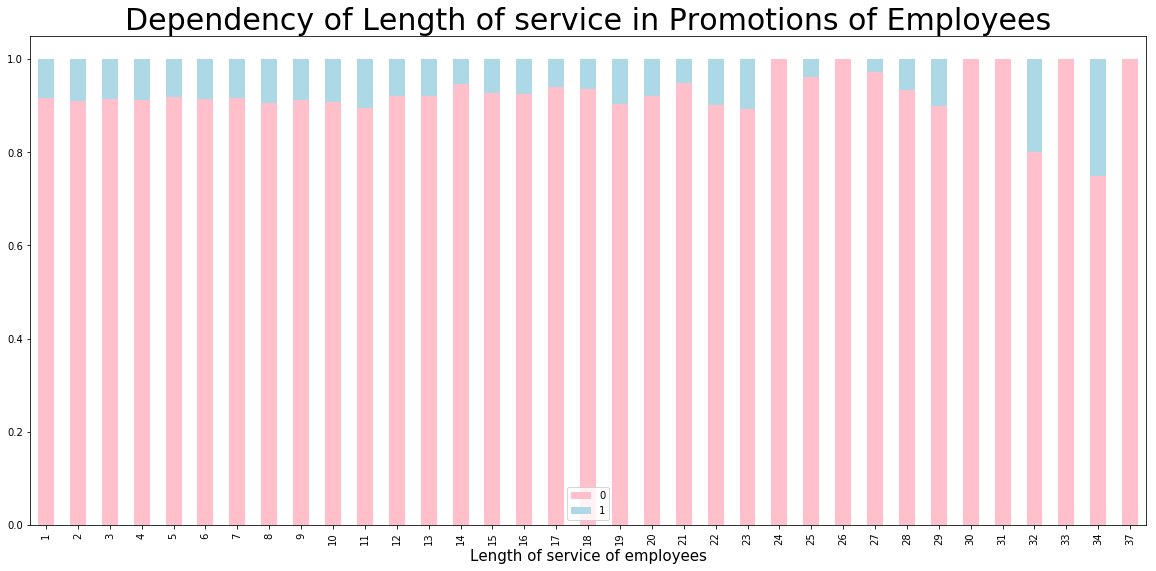

In [38]:
# checking how length of service determines the promotion of employees

data=pd.crosstab(train_data['length_of_service'],train_data['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, figsize = (20, 9), color = ['pink', 'lightblue'])

plt.title('Dependency of Length of service in Promotions of Employees', fontsize = 30)
plt.xlabel('Length of service of employees', fontsize = 15)
plt.legend()
plt.show()


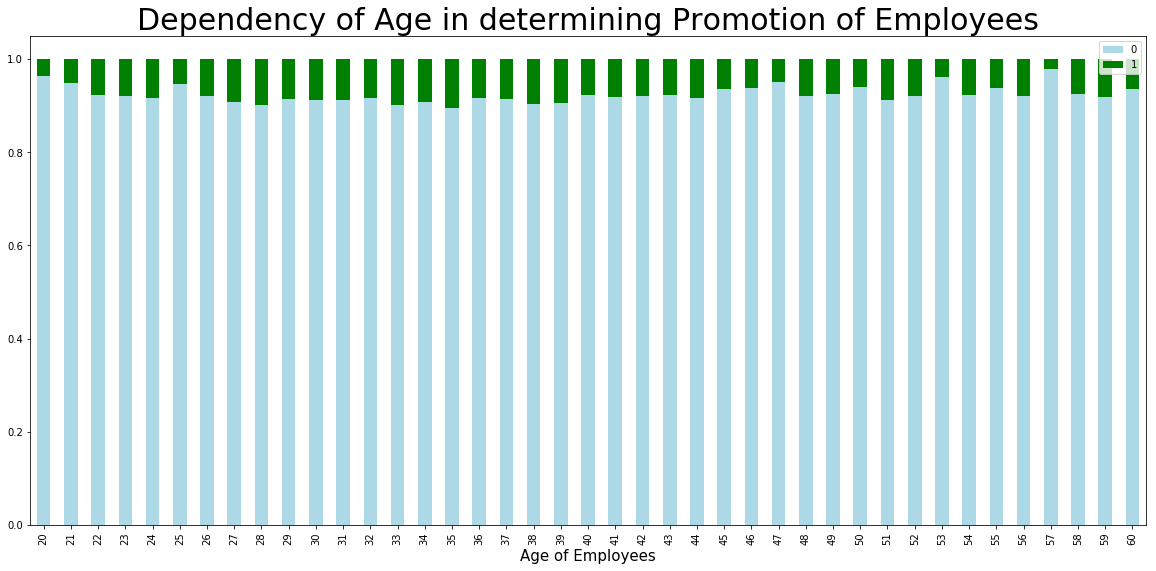

In [39]:
# checking dependency of age factor in promotion of employees

data=pd.crosstab(train_data['age'],train_data['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, figsize = (20, 9), color = ['lightblue', 'green'])

plt.title('Dependency of Age in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 15)
plt.legend()
plt.show()


This is Very Impressive that the company promotes employees of all the ages 
equally even the freshers have equal share of promotion and also the senior citizen employees are getting the equal share of Promotion in the Company



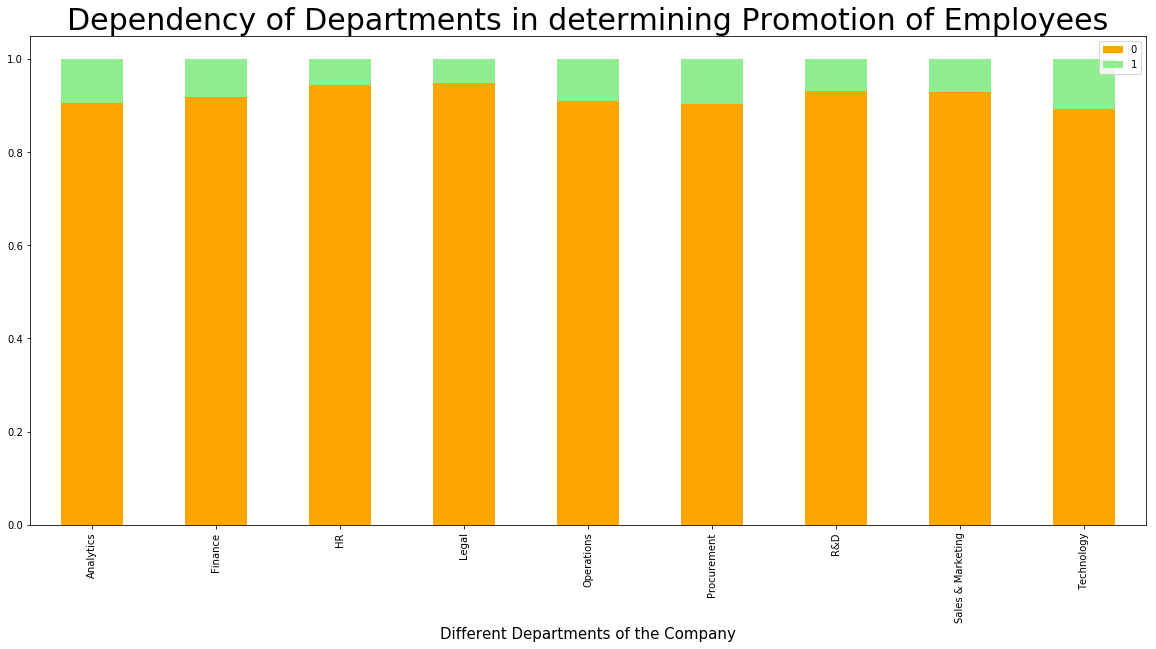

In [40]:
# checking which department got most number of promotions

data=pd.crosstab(train_data['department'],train_data['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                   stacked = True, figsize = (20, 9), color = ['orange', 'lightgreen'])

plt.title('Dependency of Departments in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 15)
plt.legend()
plt.show()


Again, Each of the departments have equal no. of promotions showing an equal developement in each of the departments of the company.

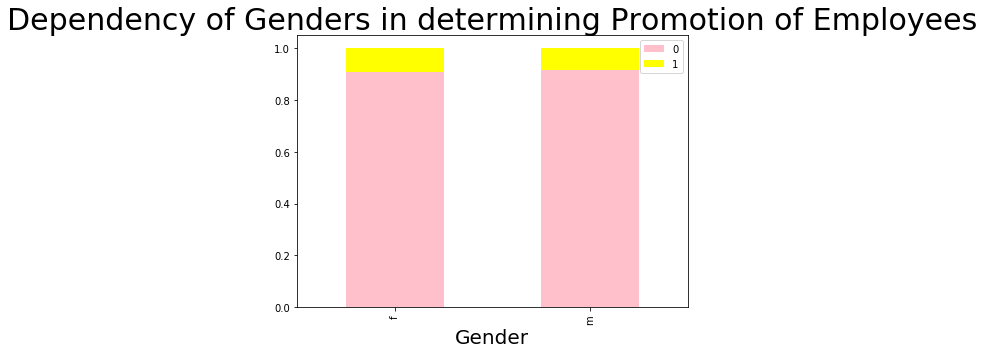

In [42]:
# checking dependency of gender over promotion

data = pd.crosstab(train_data['gender'], train_data['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5), color = ['pink', 'yellow'])

plt.title('Dependency of Genders in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.legend()
plt.show()

The above plot shows that there is no partiality between males and females in terms of promotion

# Data Pre-processing

In [10]:
#filling missing Values

train_data['education'].fillna(train_data['education'].mode()[0],inplace=True)
train_data['previous_year_rating'].fillna(1,inplace=True)

In [11]:
# again checking if there is any Null value left in the data
train_data.isnull().sum().sum()

0

In [12]:
#filling missing Values

test_data['education'].fillna(test_data['education'].mode()[0],inplace=True)
test_data['previous_year_rating'].fillna(1,inplace=True)

In [13]:
# removing the employee_id column

train_data = train_data.drop(['employee_id'], axis = 1)

train_data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [14]:
# saving the employee_id

emp_id = test_data['employee_id']

# removing the employee_id column

test_data = test_data.drop(['employee_id'], axis = 1)

test_data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [15]:
# defining the test set

x_test = test_data

x_test.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [16]:
# one hot encoding for the test set

x_test = pd.get_dummies(x_test)

x_test.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

In [17]:
# splitting the train set into dependent and independent sets

x = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (54808, 12)
Shape of y: (54808,)


In [18]:
# one hot encoding for the train set

x = pd.get_dummies(x)

x.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

# Oversampling of the Model

In [20]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_sample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

C:\Users\snehanshu17\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\snehanshu17\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Size of x-sample : (100280, 58)
Size of y-sample : (100280, 1)


In [21]:
# splitting x and y into train and validation sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_sample, y_sample, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (80224, 58)
Shape of x_valid:  (20056, 58)
Shape of y_train:  (80224, 1)
Shape of y_valid:  (20056, 1)


In [22]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)
x_valid = sc.transform(x_valid)

Modelling

Random Forest Classifer

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))

C:\Users\snehanshu17\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\snehanshu17\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Training Accuracy : 0.9960734942161946


Xg-Boost Classifier

In [24]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)

print("Training Accuracy :", xgb.score(x_train, y_train))

C:\Users\snehanshu17\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\snehanshu17\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy : 0.9465496609493419


Light Gradient Boosting Classifier

In [25]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

lgb = LGBMClassifier()
lgb.fit(x_train, y_train)

lgb_pred = lgb.predict(x_test)

print("Training Accuracy :", lgb.score(x_train, y_train))

Training Accuracy : 0.9667555843637814


Extra Trees Classifier

In [26]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

etc_pred = etc.predict(x_test)

print("Training Accuracy :", etc.score(x_train, y_train))

C:\Users\snehanshu17\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\snehanshu17\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Training Accuracy : 0.9998753490227363


In [27]:
!pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [28]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(learning_rate = 0.004, early_stopping_rounds = 100)
cbc.fit(x_train, y_train)

cbc_pred = cbc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))

0:	learn: 0.6885627	total: 111ms	remaining: 1m 51s
1:	learn: 0.6841844	total: 157ms	remaining: 1m 18s
2:	learn: 0.6798014	total: 204ms	remaining: 1m 7s
3:	learn: 0.6755812	total: 267ms	remaining: 1m 6s
4:	learn: 0.6716455	total: 322ms	remaining: 1m 4s
5:	learn: 0.6676228	total: 399ms	remaining: 1m 6s
6:	learn: 0.6636135	total: 447ms	remaining: 1m 3s
7:	learn: 0.6596729	total: 495ms	remaining: 1m 1s
8:	learn: 0.6552626	total: 556ms	remaining: 1m 1s
9:	learn: 0.6507957	total: 617ms	remaining: 1m 1s
10:	learn: 0.6466544	total: 674ms	remaining: 1m
11:	learn: 0.6427908	total: 725ms	remaining: 59.7s
12:	learn: 0.6392379	total: 806ms	remaining: 1m 1s
13:	learn: 0.6355561	total: 857ms	remaining: 1m
14:	learn: 0.6317969	total: 903ms	remaining: 59.3s
15:	learn: 0.6283454	total: 955ms	remaining: 58.7s
16:	learn: 0.6246265	total: 1.03s	remaining: 59.4s
17:	learn: 0.6215608	total: 1.07s	remaining: 58.6s
18:	learn: 0.6182266	total: 1.12s	remaining: 57.8s
19:	learn: 0.6149163	total: 1.17s	remaining: 

Boosting the Model

In [29]:
boosted_predictions = rfc_pred*0.2 + xgb_pred*0.2 + lgb_pred*0.4 + etc_pred*0.3

In [32]:
submission = pd.read_csv('sample_submission_M0L0uXE.csv')

submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [33]:
# creating a dataframe with the employee id and their predicted promoted values{0, 1}

submission = pd.DataFrame({'employee_id': emp_id,'is_promoted': boosted_predictions})

submission.head()

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0


In [34]:
# saving the submission file

filename = 'submission.csv'
submission.to_csv(filename, index = False)

print("Saved File : ", filename)

Saved File :  submission.csv
